In [98]:
%reload_ext autoreload
%autoreload 2

import sys
from scipy.stats import f_oneway
import seaborn as sns
import pandas as pd

sys.path.append("..")

from scripts.utils import DatasetBuilder, LabelingScheme, DaspsLabeling

labeling_scheme = LabelingScheme(DaspsLabeling.HAM)
builder = DatasetBuilder(labeling_scheme)
dasps, sad = builder.build_control_dataset_arrs(15)

_, p_values = f_oneway(dasps, sad)
feat_names = builder.get_feat_names()

df = pd.DataFrame(data=[p_values], columns=feat_names)
df = df.melt()

df_control_not_sig = df.query('value > 0.05')
df_control_sig = df.query('value <= 0.05')

print("Features not significantly different between control groups: ", len(df_control_not_sig))
print("Features significantly different between control groups: ", len(df_control_sig))


# df = df.sort_values(by='value', ascending=False)

control_not_sig_names = df_control_not_sig['variable'].tolist()

df_control_sig['variable'].to_list()

# usable

# g = sns.catplot(df, y='variable', x='value', kind="bar", height=100)
# g.tight_layout()

Features not significantly different between control groups:  396
Features significantly different between control groups:  416


['time_hjorth_mobility_AF3',
 'time_hjorth_mobility_F7',
 'time_hjorth_mobility_F3',
 'time_hjorth_mobility_FC5',
 'time_hjorth_mobility_T7',
 'time_hjorth_mobility_P7',
 'time_hjorth_mobility_O1',
 'time_hjorth_mobility_O2',
 'time_hjorth_mobility_P8',
 'time_hjorth_mobility_T8',
 'time_hjorth_mobility_FC6',
 'time_hjorth_mobility_F4',
 'time_hjorth_mobility_F8',
 'time_hjorth_mobility_AF4',
 'time_hjorth_complexity_F7',
 'time_hjorth_complexity_F3',
 'time_hjorth_complexity_FC5',
 'time_hjorth_complexity_P7',
 'time_hjorth_complexity_O1',
 'time_hjorth_complexity_O2',
 'time_hjorth_complexity_P8',
 'time_hjorth_complexity_FC6',
 'time_hjorth_complexity_F4',
 'time_hjorth_complexity_F8',
 'time_hjorth_complexity_AF4',
 'time_variance_AF3',
 'time_variance_F7',
 'time_variance_F3',
 'time_variance_FC5',
 'time_variance_T7',
 'time_variance_P7',
 'time_variance_O1',
 'time_variance_O2',
 'time_variance_P8',
 'time_variance_T8',
 'time_variance_FC6',
 'time_variance_F4',
 'time_variance_

Control dataset shape:
(323, 819)


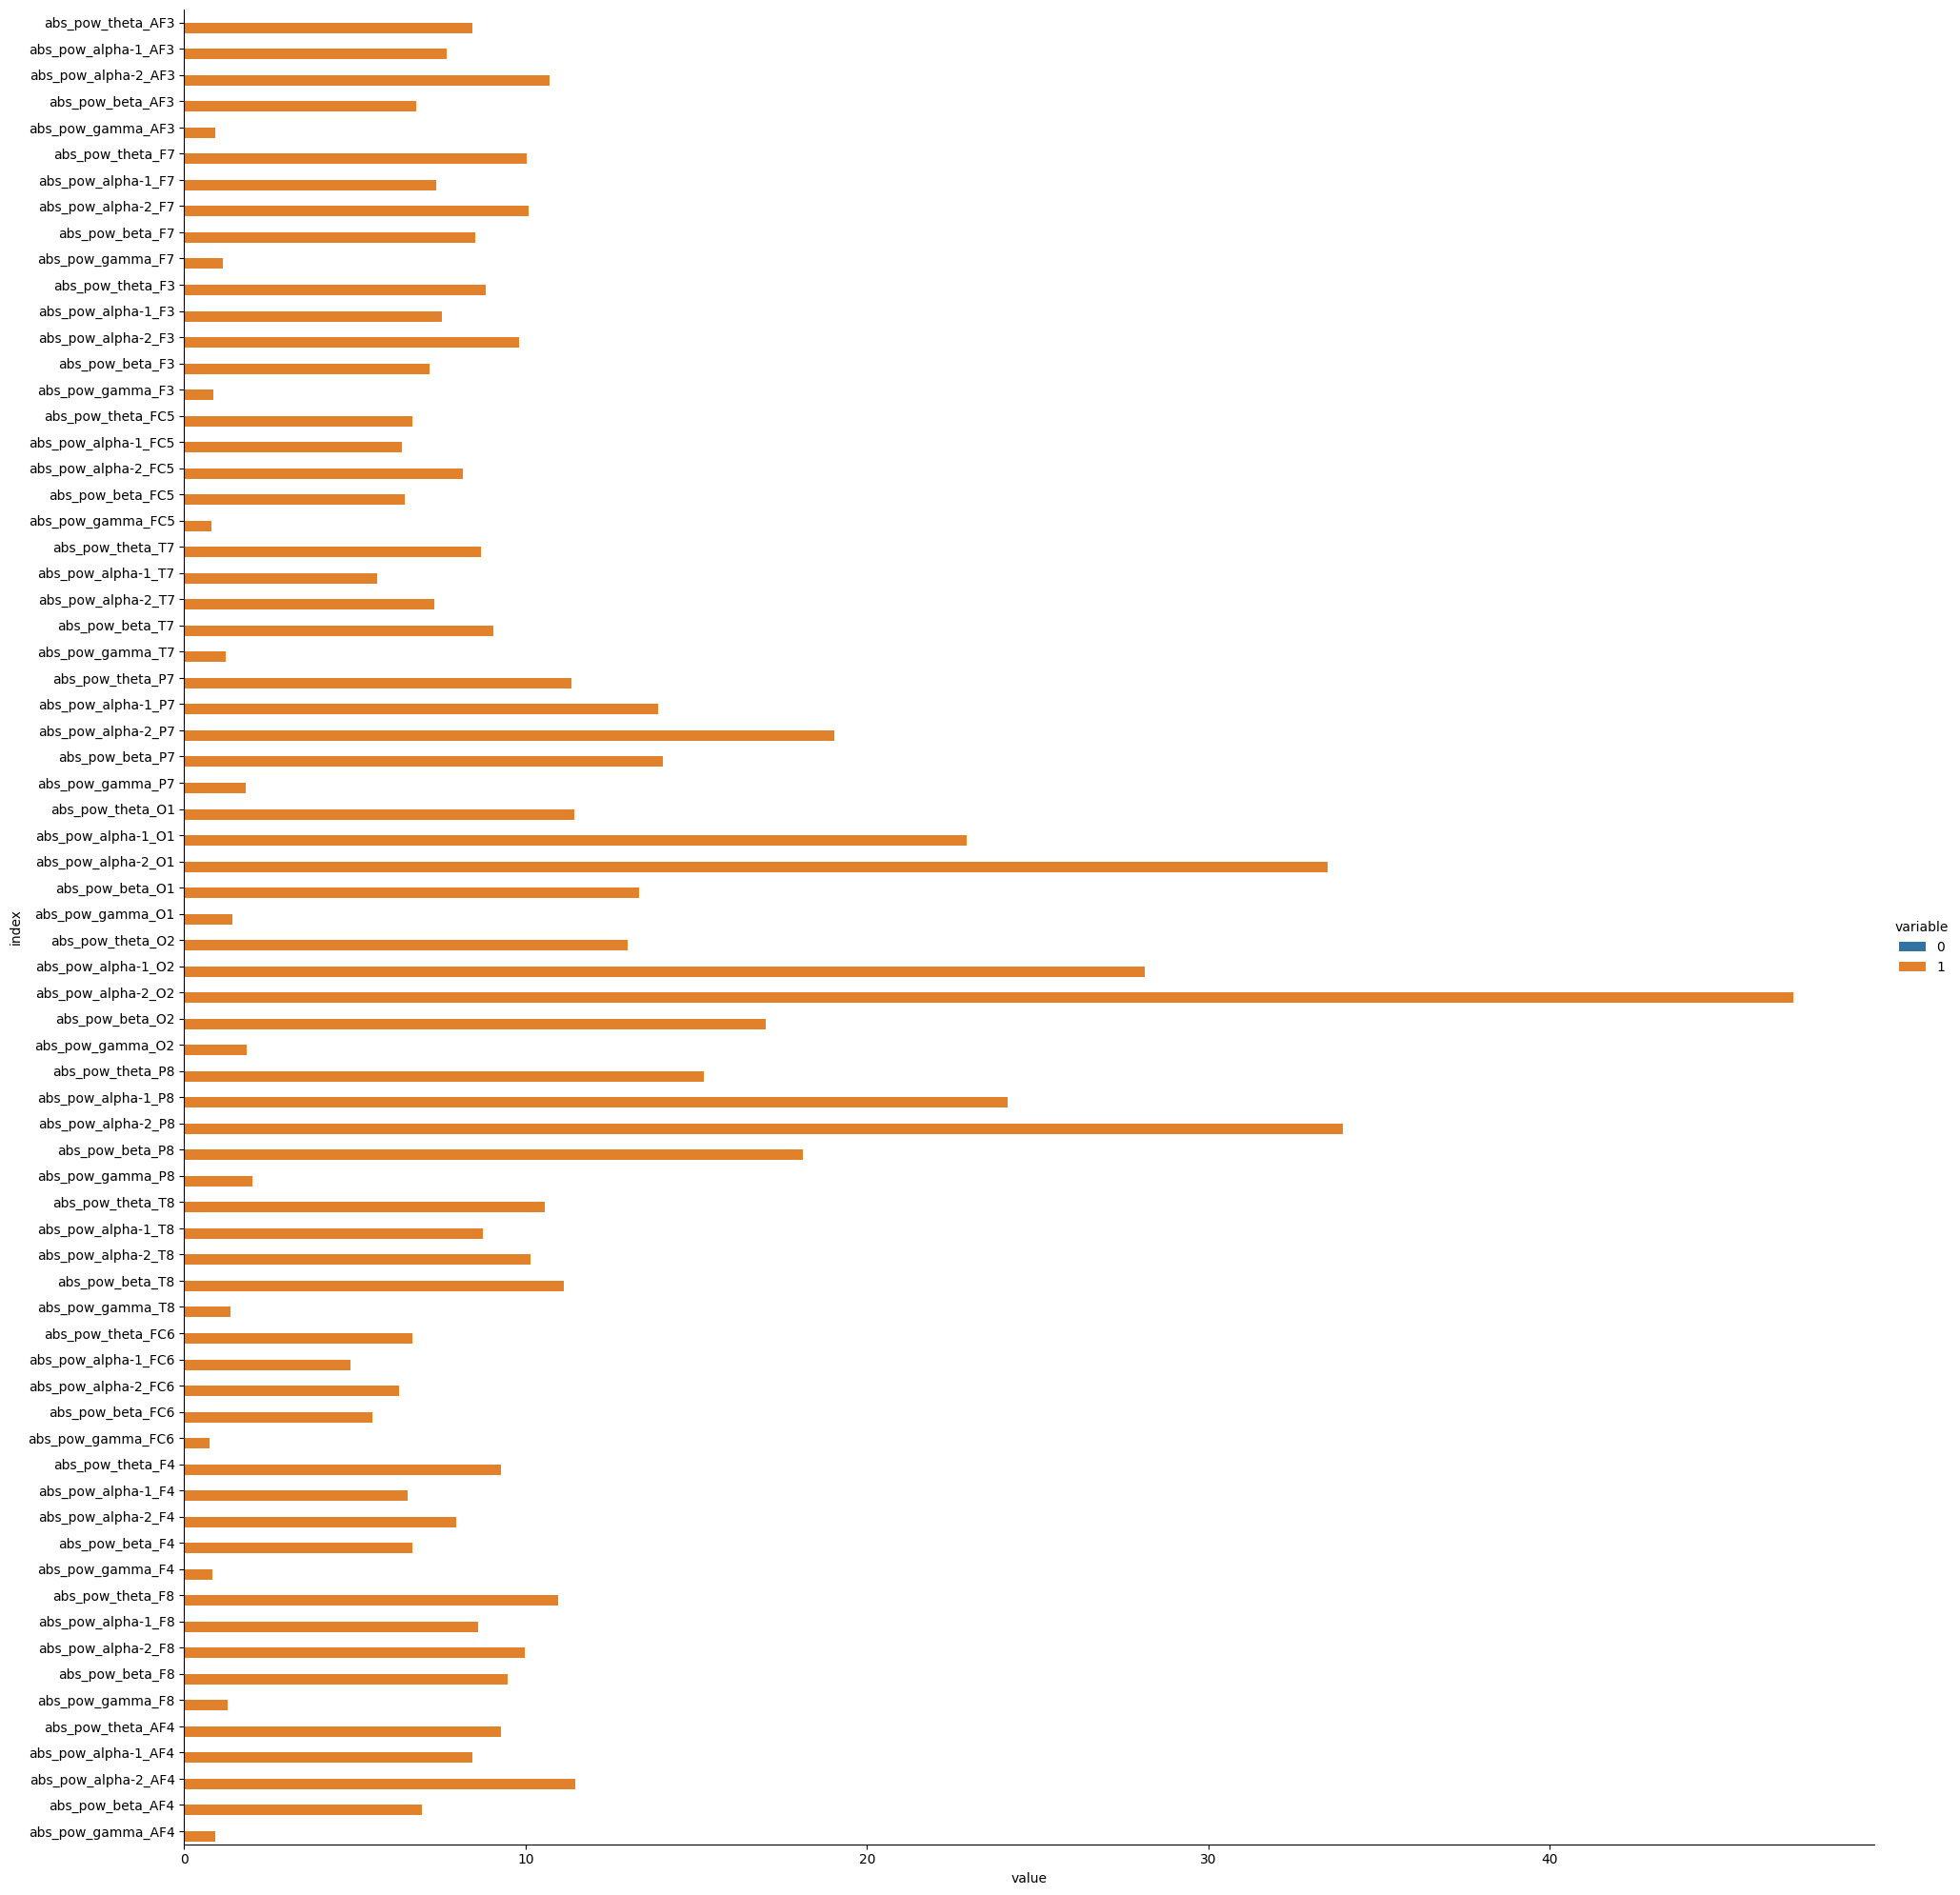

In [39]:
labeling_scheme = LabelingScheme(dasps_labeling)
builder = DatasetBuilder(labeling_scheme)

control_df = builder.build_control_dataset_df(15)

for col in control_df.columns:
    if not col.startswith('abs') and col != 'label':
        control_df.drop(col, axis=1, inplace=True)

dasps_rows = control_df[control_df['label'] == 0]
sad_rows = control_df[control_df['label'] == 1]

dasps_mean = dasps_rows.mean()
sad_mean = sad_rows.mean()

# Concat
df = pd.concat([sad_mean, dasps_mean], axis=1).reset_index()
df = df.melt(id_vars='index')
df = df.query('index != "label"')

sns.catplot(data=df, kind='bar', height=20, y='index', x='value', hue='variable')

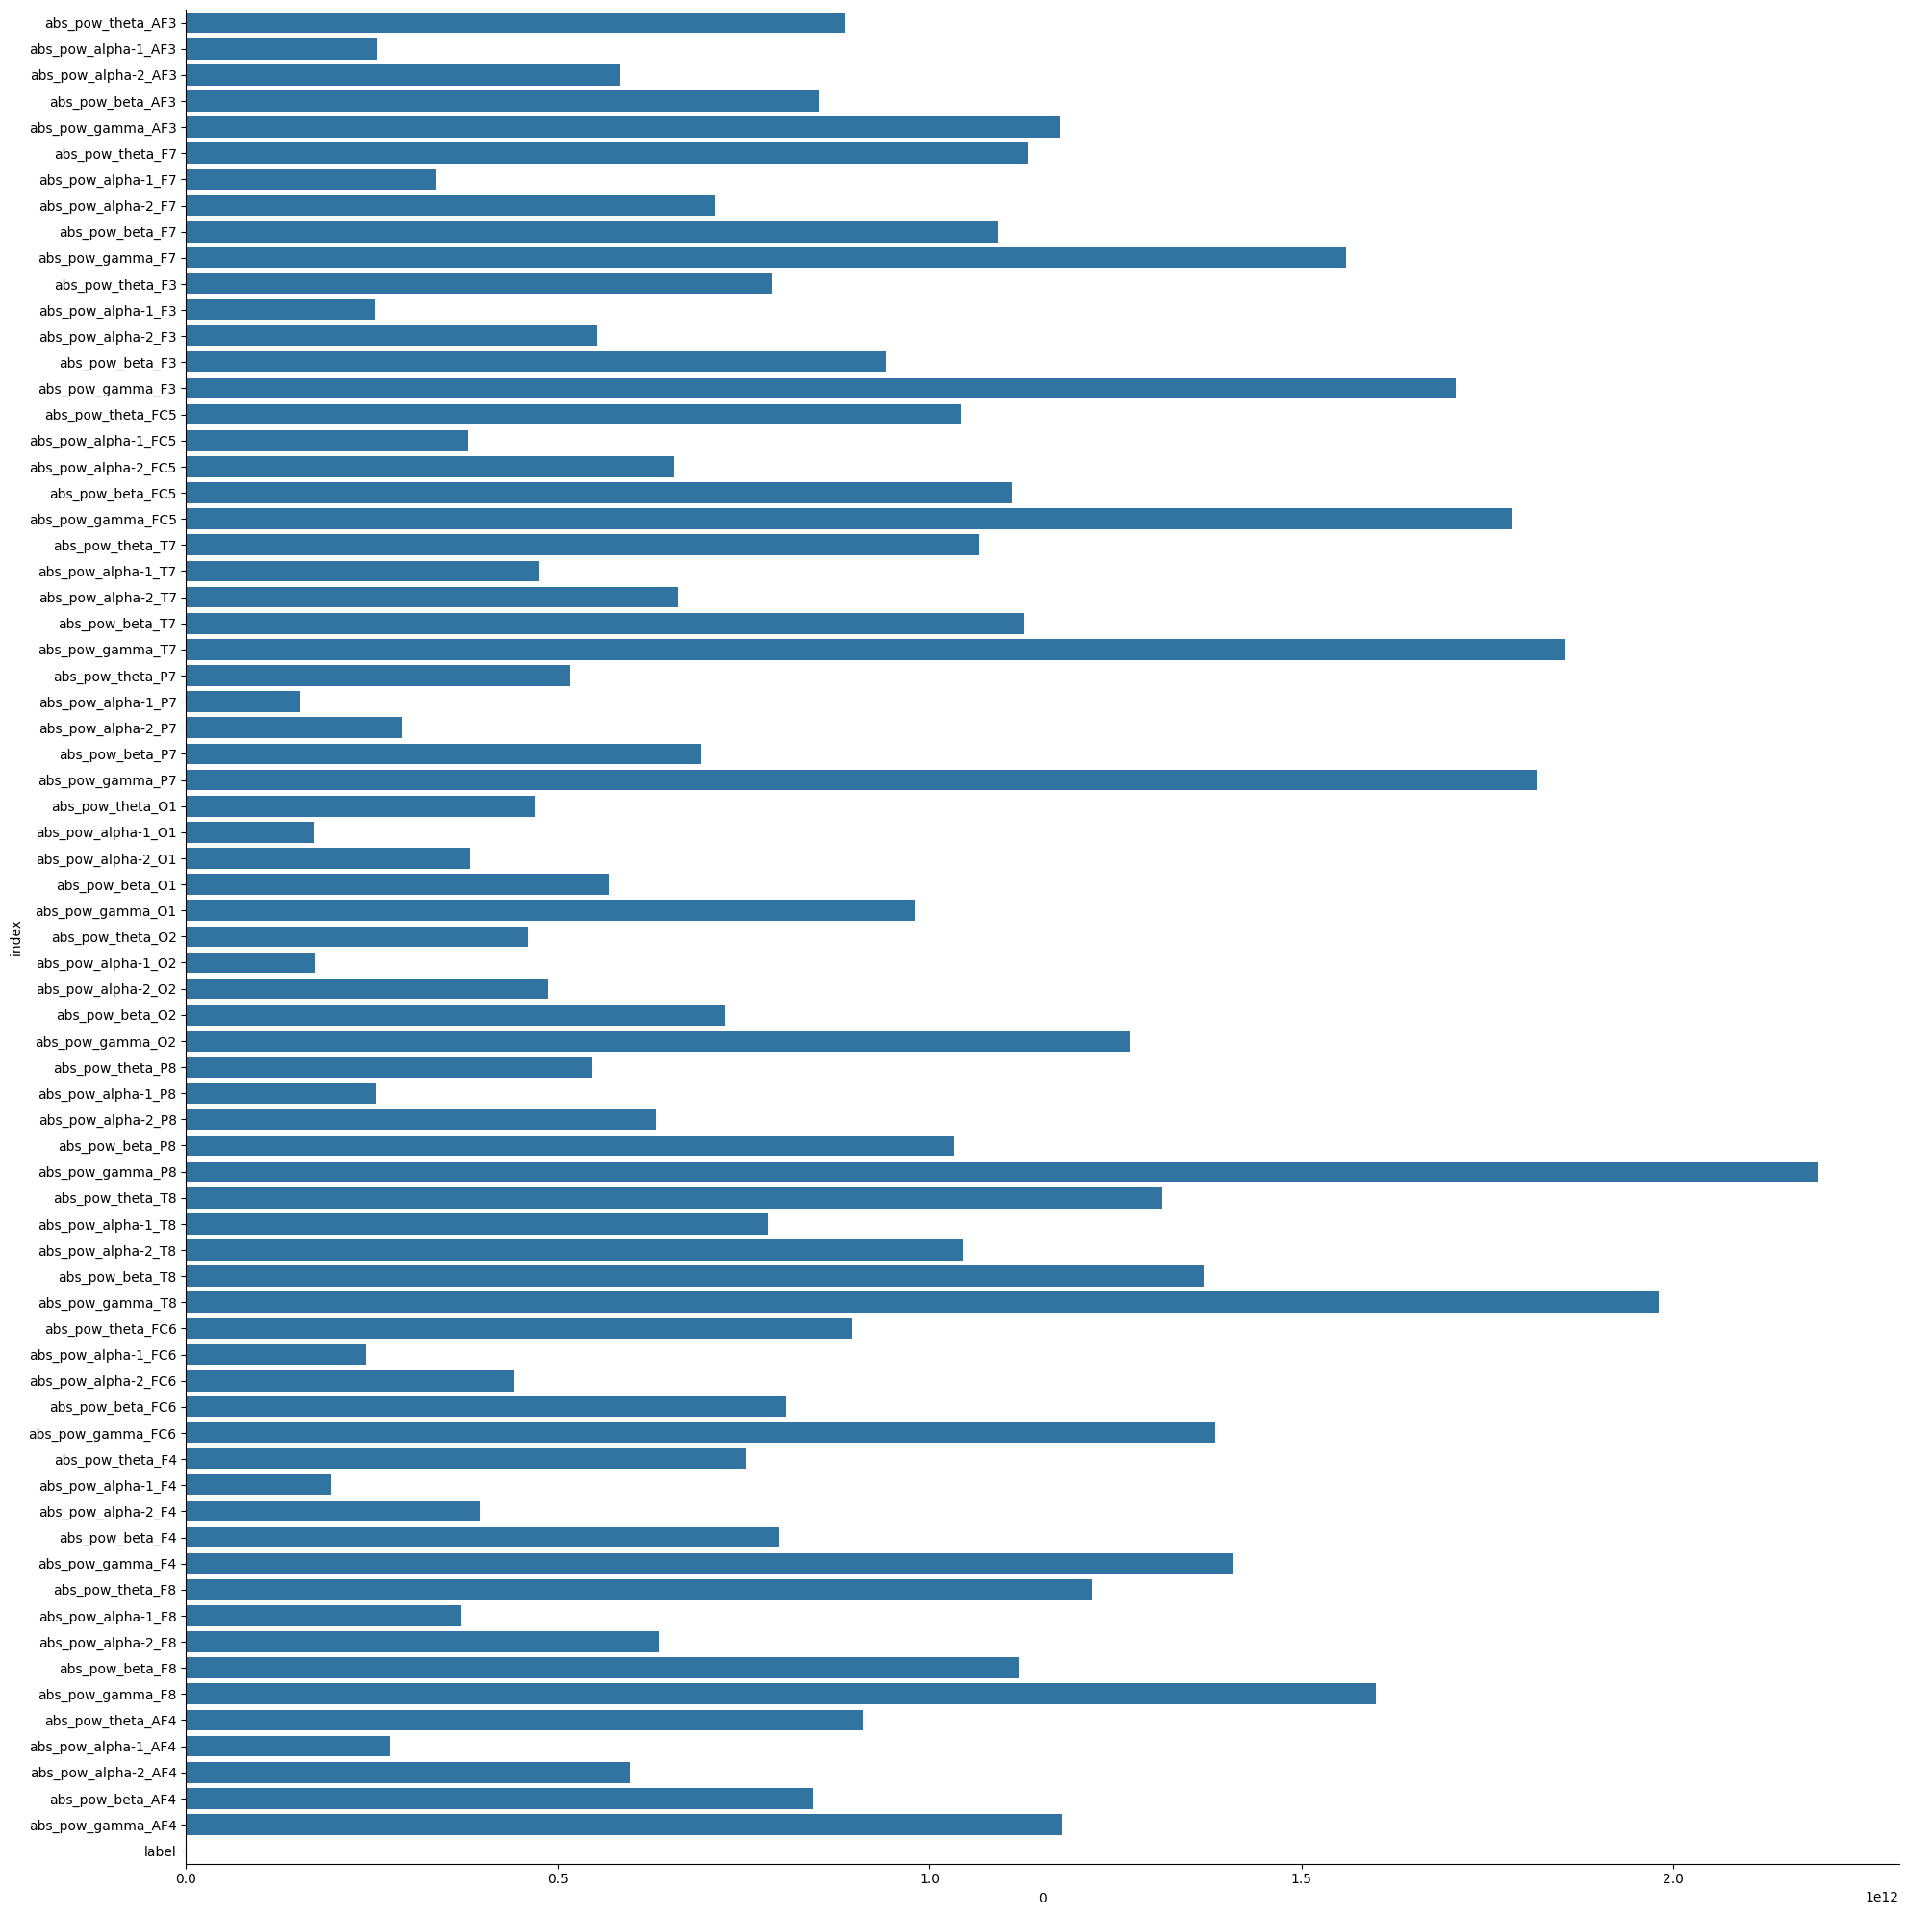

In [41]:
res = dasps_mean / sad_mean
res = res.reset_index()

sns.catplot(data=res, kind='bar', height=20, y='index', x=0)

# res.T

In [61]:
# Find whether SAM and HAM labeling of dasps in ABS powers is significantly different
builder = DatasetBuilder(LabelingScheme(DaspsLabeling.HAM))
ham_df = builder.build_control_dataset_df(15)

builder = DatasetBuilder(LabelingScheme(DaspsLabeling.SAM))
sam_df = builder.build_control_dataset_df(15)

# for col in ham_df.columns:
#     if not col.startswith('abs') and col != 'label':
#         ham_df.drop(col, axis=1, inplace=True)

# for col in sam_df.columns:
#     if not col.startswith('abs') and col != 'label':
#         sam_df.drop(col, axis=1, inplace=True)

ham_rows = ham_df[ham_df['label'] == 0]
sam_rows = sam_df[sam_df['label'] == 0]

_, p_values = f_oneway(ham_rows, sam_rows)
p_values = p_values[:-1]

feat_names = builder.get_feat_names()

df = pd.Series(p_values, index=feat_names)

df = df[df < 0.05].reset_index()

df = df[df['index'].str.startswith('abs')]

df

Control dataset shape:
(245, 819)
Control dataset shape:
(323, 819)


/Users/jakubblaha/.local/share/virtualenvs/thesis-python-yCK4mToH/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:605: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


,index,0
12,abs_pow_beta_AF3,0.018542
13,abs_pow_beta_F3,0.007367
14,abs_pow_beta_FC5,0.030319
15,abs_pow_theta_P7,0.014923
16,abs_pow_beta_P7,0.001617
17,abs_pow_gamma_P7,0.006257
18,abs_pow_theta_F4,0.012849
19,abs_pow_beta_F4,0.000625
20,abs_pow_gamma_F4,0.013837
21,abs_pow_theta_F8,0.046996


In [104]:
builder = DatasetBuilder(LabelingScheme(DaspsLabeling.HAM))
print(builder._labeling_scheme)
control, gad, sad = builder.build_dataset_arrs(15)

_, p_values = f_oneway(gad, sad)

feat_names = builder.get_feat_names()

df = pd.DataFrame(data=[p_values], columns=feat_names)
df = df.melt()

sad_gad_sig_diff = df.query('value < 0.05')

print("Significantly different features between GAD and SAD: ", len(sad_gad_sig_diff))

sad_gad_sig_diff_feat_names = sad_gad_sig_diff['variable'].tolist()

intersection = set(sad_gad_sig_diff_feat_names).intersection(set(control_not_sig_names))

print("Intersection features: ", len(intersection))

intersection

Significantly different features between GAD and SAD:  536
Intersection features:  167


{'ai_alpha-1_F8-F7',
 'ai_beta_F8-F7',
 'ai_theta_F8-F7',
 'conn_alpha-1_AF4_F3',
 'conn_alpha-1_AF4_FC5',
 'conn_alpha-1_AF4_O1',
 'conn_alpha-1_AF4_P8',
 'conn_alpha-1_AF4_T7',
 'conn_alpha-1_AF4_T8',
 'conn_alpha-1_F4_F7',
 'conn_alpha-1_F4_FC5',
 'conn_alpha-1_F4_O1',
 'conn_alpha-1_F4_P7',
 'conn_alpha-1_F4_T8',
 'conn_alpha-1_F8_F3',
 'conn_alpha-1_F8_F4',
 'conn_alpha-1_F8_FC5',
 'conn_alpha-1_F8_O1',
 'conn_alpha-1_F8_P7',
 'conn_alpha-1_F8_P8',
 'conn_alpha-1_F8_T8',
 'conn_alpha-1_FC5_AF3',
 'conn_alpha-1_FC6_F3',
 'conn_alpha-1_FC6_FC5',
 'conn_alpha-1_FC6_T8',
 'conn_alpha-1_O1_AF3',
 'conn_alpha-1_O1_F3',
 'conn_alpha-1_O1_F7',
 'conn_alpha-1_O1_FC5',
 'conn_alpha-1_O2_O1',
 'conn_alpha-1_P7_AF3',
 'conn_alpha-1_P7_F3',
 'conn_alpha-1_P7_F7',
 'conn_alpha-1_P7_FC5',
 'conn_alpha-1_P8_AF3',
 'conn_alpha-1_P8_F3',
 'conn_alpha-1_P8_FC5',
 'conn_alpha-1_P8_O1',
 'conn_alpha-1_P8_P7',
 'conn_alpha-1_T7_AF3',
 'conn_alpha-1_T7_F7',
 'conn_alpha-1_T8_AF3',
 'conn_alpha-1_T8_F3',